In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   
df = pd.read_csv('./data/train_data.csv', dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4.65 s, sys: 504 ms, total: 5.16 s
Wall time: 5.17 s


In [3]:
df.sample(1)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
390962,534,A050005003,A050000005,0,2020-10-21 06:24:51,2616


assessmentItemID: A020057001  
- 시험지 번호와 문항 번호 정보까지 포함
    - 첫 자리 A
    - 6자리는 시험지 번호
    - 3자리는 문항 번호
testId: A020000057  
- 시험지 번호
    - 첫 자리 A
    - 앞 3자리와 끝 3자리가 시험지 번호
    - 가운데 3자리는 무조건 000

In [4]:
# 유저별 푼 문항 수 + 내림차순 정렬
user_solved = df.groupby('userID').agg({
    'assessmentItemID':'count'
})
user_solved = user_solved.sort_values(by=['assessmentItemID'], ascending=False)
user_solved['userID'] = user_solved.index
user_solved

,assessmentItemID,userID
userID,,
730,1860,730
481,1847,481
1112,1777,1112
394,1774,394
926,1773,926
...,...,...
7396,14,7396
7414,13,7414
7390,13,7390


Text(0, 0.5, 'solved_problems')

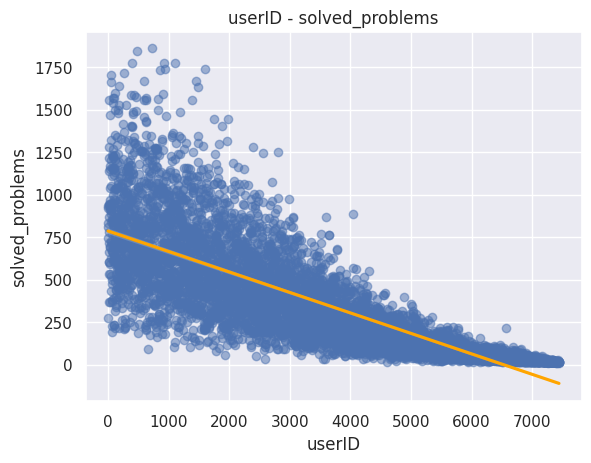

In [5]:
# 유저별로 푼 문항수를 1000단위로
fig, ax = plt.subplots()
sns.regplot(data=user_solved, x='userID', y='assessmentItemID',
           line_kws={"color": "orange"}, scatter_kws={'alpha':0.5}, ax=ax)

ax.set_title('userID - solved_problems')
ax.set_xlabel('userID')
ax.set_ylabel('solved_problems')

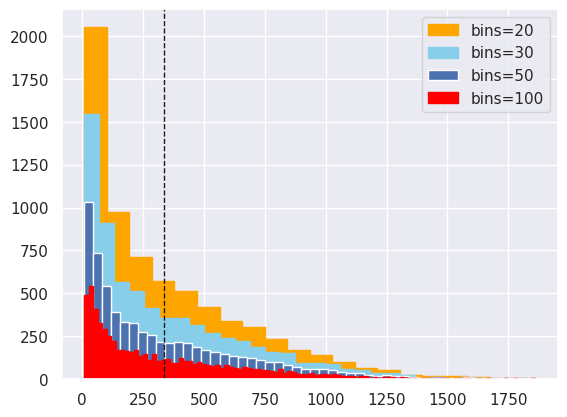

In [6]:
solved_problems = user_solved['assessmentItemID']
plt.hist(solved_problems, bins=20, label='bins=20', color = "orange", ec="orange")
plt.hist(solved_problems, bins=30, label='bins=30', color = "skyblue", ec="skyblue")
plt.hist(solved_problems, bins=50, label='bins=50')
plt.hist(solved_problems, bins=100, label='bins=100', color = "red", ec="red")
plt.axvline(solved_problems.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [7]:
def percentile(s):
    return np.sum(s) / len(s)

In [8]:
# 문항별 정답률 + 내림차순 정렬
problem_answer_rate = df.groupby('assessmentItemID').agg({
    'answerCode':percentile,
    'assessmentItemID':'count'
})
problem_answer_rate.rename(columns={'assessmentItemID':'count'}, inplace = True)
problem_answer_rate.rename(columns={'answerCode':'answer_rate'}, inplace = True)
problem_answer_rate = problem_answer_rate.sort_values(by=['answer_rate', 'count'], ascending=False)
problem_answer_rate

,answer_rate,count
assessmentItemID,,
A020080003,0.996310,271
A060002002,0.995434,219
A040184001,0.992565,269
A050169001,0.992424,132
A060186003,0.991111,225
...,...,...
A040028002,0.101887,265
A040060002,0.097378,267
A090071004,0.088889,45


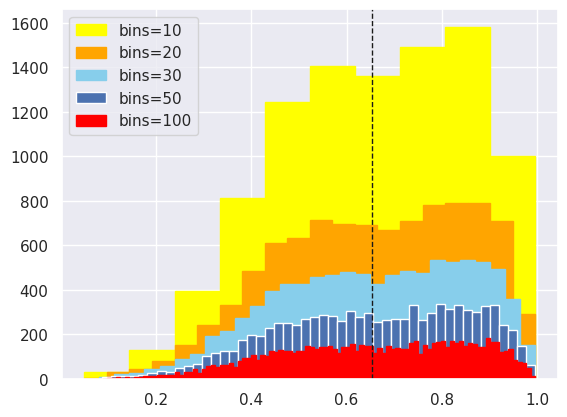

In [9]:
answer_rate = problem_answer_rate['answer_rate']
plt.hist(answer_rate, bins=10, label='bins=10', color = "yellow", ec="yellow")
plt.hist(answer_rate, bins=20, label='bins=20', color = "orange", ec="orange")
plt.hist(answer_rate, bins=30, label='bins=30', color = "skyblue", ec="skyblue")
plt.hist(answer_rate, bins=50, label='bins=50')
plt.hist(answer_rate, bins=100, label='bins=100', color = "red", ec="red")
plt.axvline(answer_rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

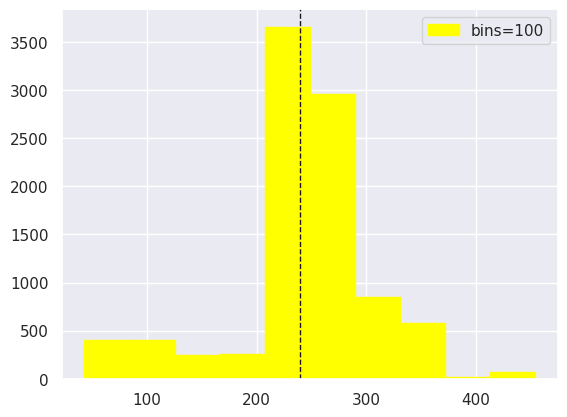

In [10]:
count = problem_answer_rate['count']
plt.hist(count, bins=10, label='bins=100', color = "yellow", ec="yellow")
plt.axvline(count.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [11]:
# 가정: 각 시험지들은 특정 과목에 대한 시험이다
# 파악 방법: testID로 groupby를 하고, KnowledgeTag를 나열시킴
testId_KnowledgeTag = df.groupby('testId')['KnowledgeTag'].apply(lambda x: set(x)).reset_index()
testId_KnowledgeTag.rename(columns={'KnowledgeTag':'KnowledgeTag_list'}, inplace = True)
testId_KnowledgeTag['count_of_KnowledgeTag'] = testId_KnowledgeTag['KnowledgeTag_list'].apply(len)
testId_KnowledgeTag = testId_KnowledgeTag.sort_values(by=['count_of_KnowledgeTag', 'testId'], ascending=False)
testId_KnowledgeTag

,testId,KnowledgeTag_list,count_of_KnowledgeTag
1313,A070000153,"{9079, 9077, 7862, 7863, 9080, 9082, 9086, 3288}",8
1254,A070000094,"{8901, 8875, 8877, 8879, 8880, 8881, 8885, 8891}",8
1323,A070000163,"{9121, 9122, 9124, 9797, 9126, 9125, 7867}",7
1314,A070000154,"{7866, 9079, 9077, 7862, 7863, 9080, 9082}",7
1301,A070000141,"{9067, 9068, 9069, 9070, 9071, 9099, 9075}",7
...,...,...,...
9,A010000010,{5485},1
8,A010000009,{5485},1
7,A010000008,{5814},1
6,A010000007,{5814},1


In [12]:
testId_count = df['testId'].value_counts().to_frame()
testId_count.rename(columns={'testId':'count_of_testId'}, inplace = True)
testId_count['testId'] = testId_count.index
testId_count

,count_of_testId,testId
A080000128,3960,A080000128
A080000131,3640,A080000131
A090000015,3624,A090000015
A090000011,3616,A090000011
A090000009,3616,A090000009
...,...,...
A030000186,180,A030000186
A010000166,176,A010000166
A010000178,176,A010000178
A010000181,176,A010000181


In [13]:
testId_KnowledgeTag_count = pd.merge(testId_KnowledgeTag, testId_count, on='testId', how='left')
testId_KnowledgeTag_count

,testId,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId
0,A070000153,"{9079, 9077, 7862, 7863, 9080, 9082, 9086, 3288}",8,1728
1,A070000094,"{8901, 8875, 8877, 8879, 8880, 8881, 8885, 8891}",8,1784
2,A070000163,"{9121, 9122, 9124, 9797, 9126, 9125, 7867}",7,1712
3,A070000154,"{7866, 9079, 9077, 7862, 7863, 9080, 9082}",7,736
4,A070000141,"{9067, 9068, 9069, 9070, 9071, 9099, 9075}",7,1768
...,...,...,...,...
1532,A010000010,{5485},1,1580
1533,A010000009,{5485},1,1590
1534,A010000008,{5814},1,1585
1535,A010000007,{5814},1,1570


In [40]:
testId_count_of_assessmentItemID = df.groupby('testId')['assessmentItemID'].apply(lambda x: len(set(x))).reset_index()
testId_count_of_assessmentItemID.rename(columns={'assessmentItemID':'count_of_problems_per_testId'}, inplace = True)
testId_count_of_assessmentItemID

,testId,count_of_problems_per_testId
0,A010000001,5
1,A010000002,5
2,A010000003,5
3,A010000004,5
4,A010000005,5
...,...,...
1532,A090000070,8
1533,A090000071,8
1534,A090000072,6
1535,A090000073,6


In [41]:
testId_KnowledgeTag_count_ = pd.merge(testId_KnowledgeTag_count, testId_count_of_assessmentItemID, on='testId', how='left')
testId_KnowledgeTag_count_

,testId,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId,count_of_problems_per_testId
0,A070000153,"{9079, 9077, 7862, 7863, 9080, 9082, 9086, 3288}",8,1728,8
1,A070000094,"{8901, 8875, 8877, 8879, 8880, 8881, 8885, 8891}",8,1784,8
2,A070000163,"{9121, 9122, 9124, 9797, 9126, 9125, 7867}",7,1712,8
3,A070000154,"{7866, 9079, 9077, 7862, 7863, 9080, 9082}",7,736,8
4,A070000141,"{9067, 9068, 9069, 9070, 9071, 9099, 9075}",7,1768,8
...,...,...,...,...,...
1532,A010000010,{5485},1,1580,5
1533,A010000009,{5485},1,1590,5
1534,A010000008,{5814},1,1585,5
1535,A010000007,{5814},1,1570,5


In [16]:
first_3_numbers = set()
for a in df['testId'].unique():
    first_3_numbers.add(a[1:4])
first_3_numbers

{'010', '020', '030', '040', '050', '060', '070', '080', '090'}

In [17]:
# first_3_numbers를 기준으로 KnowledgeTag groupby
# first_3_numbers_KnowledgeTag = df.groupby('testId').str[1:4].reset_index()
first_3_numbers_KnowledgeTag = df['testId'].to_frame()
first_3_numbers_KnowledgeTag['first_3'] = df['assessmentItemID'].str[1:4].to_frame()
# first_3_numbers_KnowledgeTag.rename(columns={'assessmentItemID':'first_3'}, inplace = True)
first_3_numbers_KnowledgeTag

,testId,first_3
0,A060000001,060
1,A060000001,060
2,A060000001,060
3,A060000001,060
4,A060000001,060
...,...,...
2266581,A030000071,030
2266582,A040000165,040
2266583,A040000165,040
2266584,A040000165,040


In [18]:
testId_KnowledgeTag_count__ = pd.merge(testId_KnowledgeTag_count_, first_3_numbers_KnowledgeTag, on='testId', how='left')
testId_KnowledgeTag_count__ = testId_KnowledgeTag_count__.drop_duplicates(['testId'])
testId_KnowledgeTag_count__

,testId,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId,count_of_assessmentItemID,first_3
0,A070000153,"{9079, 9077, 7862, 7863, 9080, 9082, 9086, 3288}",8,1728,1728,070
1728,A070000094,"{8901, 8875, 8877, 8879, 8880, 8881, 8885, 8891}",8,1784,1784,070
3512,A070000163,"{9121, 9122, 9124, 9797, 9126, 9125, 7867}",7,1712,1712,070
5224,A070000154,"{7866, 9079, 9077, 7862, 7863, 9080, 9082}",7,736,736,070
5960,A070000141,"{9067, 9068, 9069, 9070, 9071, 9099, 9075}",7,1768,1768,070
...,...,...,...,...,...,...
2258676,A010000010,{5485},1,1580,1580,010
2260256,A010000009,{5485},1,1590,1590,010
2261846,A010000008,{5814},1,1585,1585,010
2263431,A010000007,{5814},1,1570,1570,010


In [19]:
tmp = pd.merge(df, testId_KnowledgeTag_count__, on='testId', how='left')
tmp

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId,count_of_assessmentItemID,first_3
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,"{7224, 7225}",2,1338,1338,060
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,"{7224, 7225}",2,1338,1338,060
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,"{7224, 7225}",2,1338,1338,060
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,"{7224, 7225}",2,1338,1338,060
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,"{7224, 7225}",2,1338,1338,060
...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,{438},1,1390,1390,030
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,{8836},1,1096,1096,040
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,{8836},1,1096,1096,040
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,{8836},1,1096,1096,040


In [28]:
first_3_knowledgeTag = tmp.groupby('first_3')['KnowledgeTag'].apply(lambda x: sorted(set(x))).reset_index()
first_3_knowledgeTag.rename(columns={'KnowledgeTag':'KnowledgeTag_list'}, inplace = True)
first_3_knowledgeTag

,first_3,KnowledgeTag_list
0,010,"[5485, 5814, 5834, 5836, 5844, 5845, 5846, 630..."
1,020,"[7693, 7694, 7696, 7747, 7751, 7822, 7912, 791..."
2,030,"[307, 308, 309, 331, 332, 334, 339, 342, 346, ..."
3,040,"[2047, 2048, 2049, 2050, 2053, 2054, 2055, 206..."
4,050,"[192, 202, 360, 374, 392, 393, 394, 395, 396, ..."
5,060,"[586, 587, 588, 589, 590, 592, 593, 594, 595, ..."
6,070,"[116, 117, 121, 162, 163, 164, 169, 607, 608, ..."
7,080,"[23, 24, 25, 26, 30, 31, 32, 1107, 1108, 1110,..."
8,090,"[78, 971, 972, 974, 975, 1000, 1002, 1009, 101..."


In [30]:
first_3_knowledgeTag['KnowledgeTag_count'] = first_3_knowledgeTag['KnowledgeTag_list'].apply(len)
first_3_knowledgeTag

,first_3,KnowledgeTag_list,KnowledgeTag_count
0,010,"[5485, 5814, 5834, 5836, 5844, 5845, 5846, 630...",64
1,020,"[7693, 7694, 7696, 7747, 7751, 7822, 7912, 791...",70
2,030,"[307, 308, 309, 331, 332, 334, 339, 342, 346, ...",85
3,040,"[2047, 2048, 2049, 2050, 2053, 2054, 2055, 206...",81
4,050,"[192, 202, 360, 374, 392, 393, 394, 395, 396, ...",98
5,060,"[586, 587, 588, 589, 590, 592, 593, 594, 595, ...",93
6,070,"[116, 117, 121, 162, 163, 164, 169, 607, 608, ...",176
7,080,"[23, 24, 25, 26, 30, 31, 32, 1107, 1108, 1110,...",150
8,090,"[78, 971, 972, 974, 975, 1000, 1002, 1009, 101...",96


In [34]:
for i in range(len(first_3_knowledgeTag) - 1):
    for j in range(i + 1, len(first_3_knowledgeTag)):
        list1 = first_3_knowledgeTag['KnowledgeTag_list'].iloc[i]
        list2 = first_3_knowledgeTag['KnowledgeTag_list'].iloc[j]
        matching_res = list(set(list1).intersection(list2))
        if matching_res:
            print(i,j,matching_res)

6 7 [7863]


In [43]:
testId_KnowledgeTag_count_

,testId,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId,count_of_problems_per_testId
0,A070000153,"{9079, 9077, 7862, 7863, 9080, 9082, 9086, 3288}",8,1728,8
1,A070000094,"{8901, 8875, 8877, 8879, 8880, 8881, 8885, 8891}",8,1784,8
2,A070000163,"{9121, 9122, 9124, 9797, 9126, 9125, 7867}",7,1712,8
3,A070000154,"{7866, 9079, 9077, 7862, 7863, 9080, 9082}",7,736,8
4,A070000141,"{9067, 9068, 9069, 9070, 9071, 9099, 9075}",7,1768,8
...,...,...,...,...,...
1532,A010000010,{5485},1,1580,5
1533,A010000009,{5485},1,1590,5
1534,A010000008,{5814},1,1585,5
1535,A010000007,{5814},1,1570,5


In [45]:
tmp2 = pd.merge(df, problem_answer_rate, on='assessmentItemID', how='left')
tmp2

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,answer_rate,count
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0.982063,223
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0.964126,223
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0.910314,223
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0.968610,223
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0.941704,223
...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,0.435252,278
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,0.649635,274
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,0.635036,274
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,0.791971,274


In [46]:
tmp3 = pd.merge(tmp2, testId_KnowledgeTag_count__, on='testId', how='left')
tmp3

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,answer_rate,count,KnowledgeTag_list,count_of_KnowledgeTag,count_of_testId,count_of_assessmentItemID,first_3
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0.982063,223,"{7224, 7225}",2,1338,1338,060
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0.964126,223,"{7224, 7225}",2,1338,1338,060
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0.910314,223,"{7224, 7225}",2,1338,1338,060
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0.968610,223,"{7224, 7225}",2,1338,1338,060
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0.941704,223,"{7224, 7225}",2,1338,1338,060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,0.435252,278,{438},1,1390,1390,030
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,0.649635,274,{8836},1,1096,1096,040
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,0.635036,274,{8836},1,1096,1096,040
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,0.791971,274,{8836},1,1096,1096,040


In [47]:
tmp3
testId_count_of_assessmentItemID = df.groupby('testId')['assessmentItemID'].apply(lambda x: len(set(x))).reset_index()
testId_count_of_assessmentItemID.rename(columns={'assessmentItemID':'count_of_problems_per_testId'}, inplace = True)
testId_count_of_assessmentItemID

tmp4 = tmp3.groupby('first_3').agg({'answer_rate':'mean'})
tmp4

,answer_rate
first_3,
010,0.800876
020,0.737593
030,0.702238
040,0.684056
050,0.658208
060,0.709232
070,0.521876
080,0.502598
090,0.449948


In [48]:
first_3_knowledgeTag = pd.merge(first_3_knowledgeTag, tmp4, on='first_3', how='inner')
first_3_knowledgeTag

,first_3,KnowledgeTag_list,KnowledgeTag_count,answer_rate
0,010,"[5485, 5814, 5834, 5836, 5844, 5845, 5846, 630...",64,0.800876
1,020,"[7693, 7694, 7696, 7747, 7751, 7822, 7912, 791...",70,0.737593
2,030,"[307, 308, 309, 331, 332, 334, 339, 342, 346, ...",85,0.702238
3,040,"[2047, 2048, 2049, 2050, 2053, 2054, 2055, 206...",81,0.684056
4,050,"[192, 202, 360, 374, 392, 393, 394, 395, 396, ...",98,0.658208
5,060,"[586, 587, 588, 589, 590, 592, 593, 594, 595, ...",93,0.709232
6,070,"[116, 117, 121, 162, 163, 164, 169, 607, 608, ...",176,0.521876
7,080,"[23, 24, 25, 26, 30, 31, 32, 1107, 1108, 1110,...",150,0.502598
8,090,"[78, 971, 972, 974, 975, 1000, 1002, 1009, 101...",96,0.449948


In [49]:
tmp5 = tmp3.groupby('first_3').agg({'testId':'count'})
tmp5

,testId
first_3,
010,272082
020,268327
030,273762
040,267323
050,275773
060,264434
070,279164
080,246336
090,119385
